# Intro audio with Python

In [13]:
import numpy as np
import matplotlib.pyplot as plt 
import librosa
import librosa.display
import tensorflow as tf
import tensorflow_io as tfio


audio_file = "BrumD.wav"
y, sr = librosa.load(audio_file, sr=44100)
time = np.arange(0, len(y))/sr

In [12]:
import soundfile as sf
from audiomentations import Compose, PitchShift, ClippingDistortion, TimeStretch, TanhDistortion, LoudnessNormalization
import numpy as np

augment = Compose([
    
    PitchShift(min_semitones=-12, max_semitones=12, p=1.0),
    ClippingDistortion(min_percentile_threshold=0, max_percentile_threshold=40, p=1.0),
    TimeStretch(min_rate=0.2, max_rate=0.3, leave_length_unchanged=True, p=1.0),
    TanhDistortion(min_distortion=0.9, max_distortion=1.0, p=1.0),
    LoudnessNormalization(min_lufs_in_db=-14, max_lufs_in_db=-12, p=1.0)
])

if __name__ == "__name__":
    y, sr = librosa.load(audio_file, sr=44100)
# Augment/transform/perturb the audio data
augmented_y = augment(y, sr)
sf.write ("BrumD_augmented_alle.wav", augmented_y, sr)

In [130]:
y.shape

(425242,)

In [131]:
sr

44100

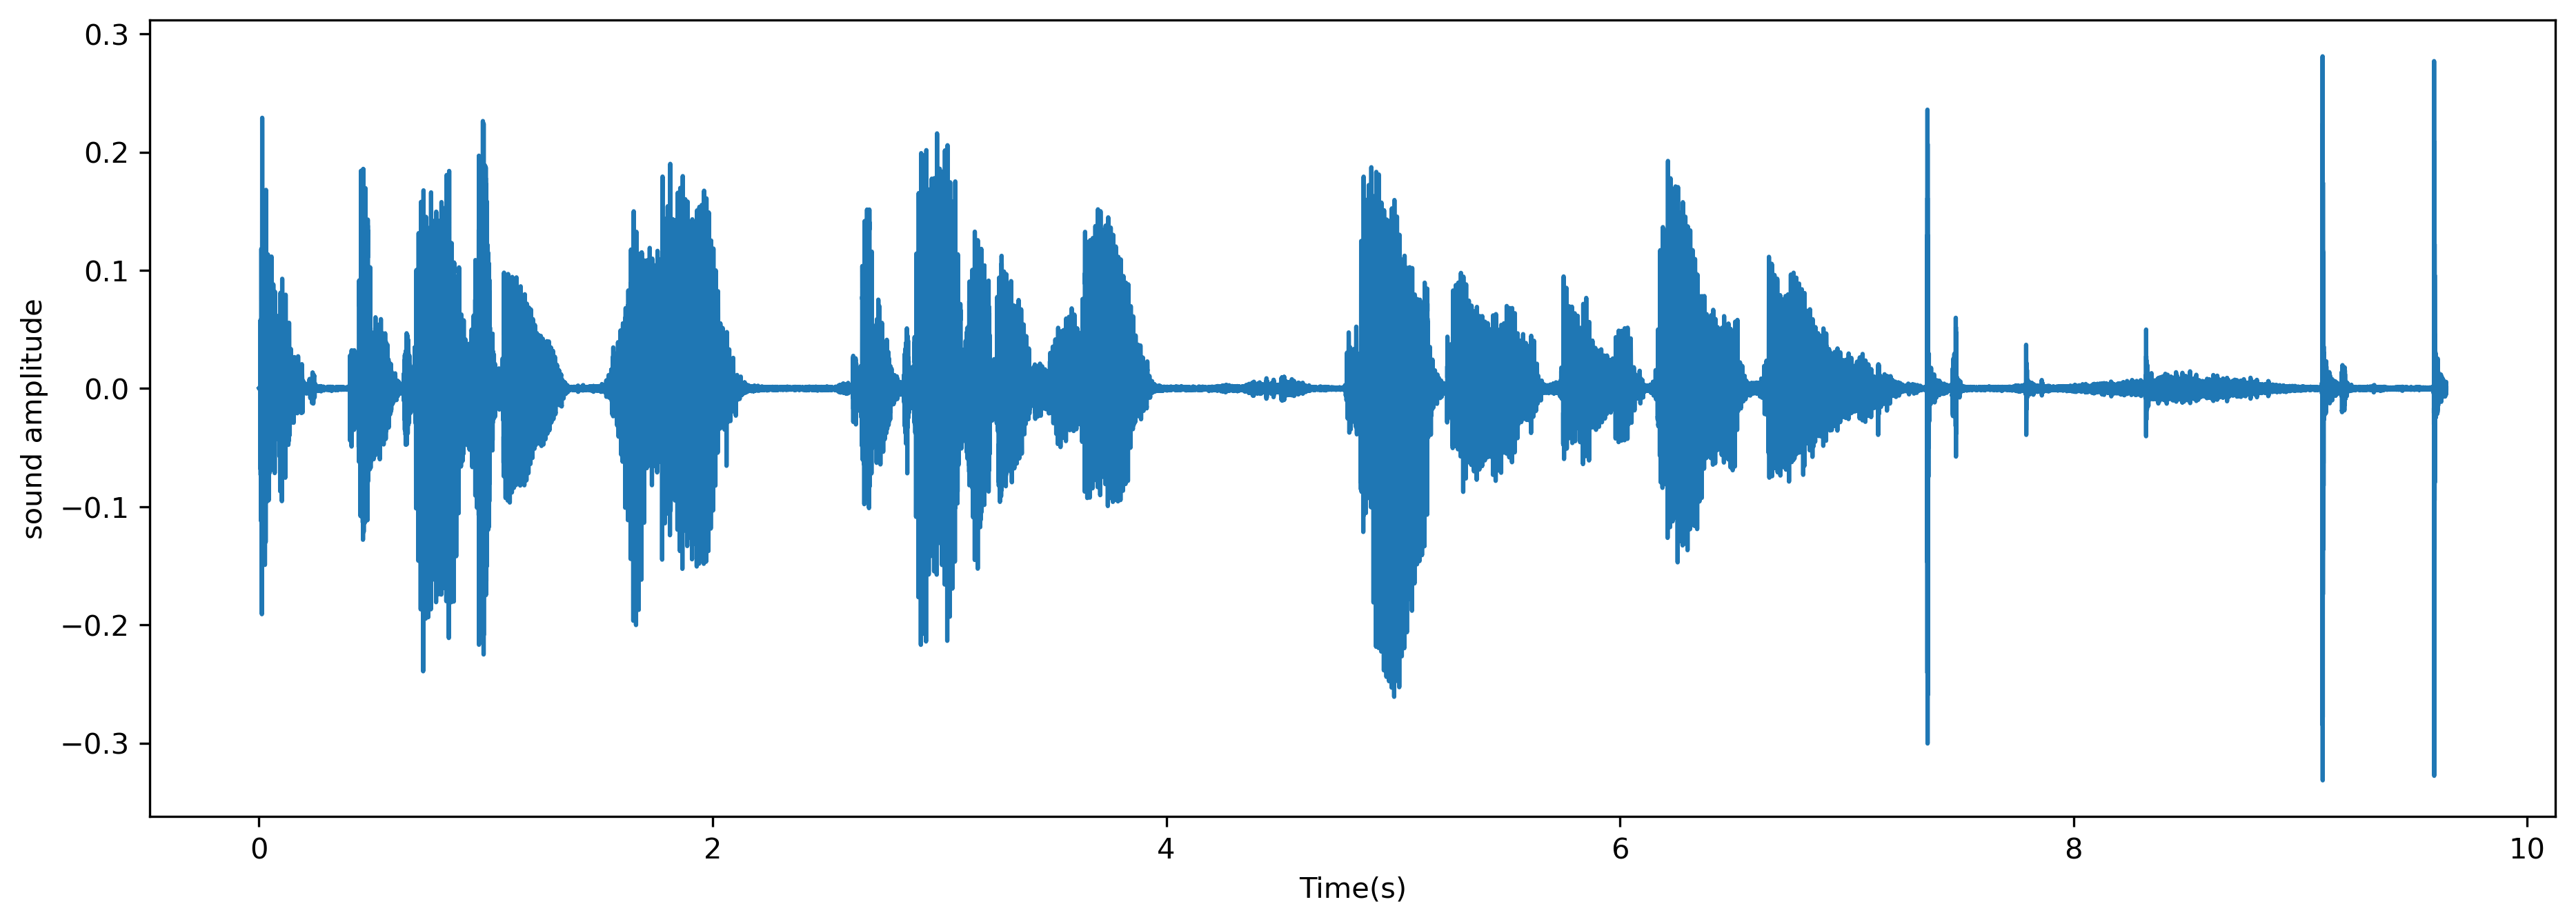

In [132]:
fig, ax = plt.subplots(figsize=(15, 5), dpi=300)

ax.plot(time, y)
ax.set(xlabel='Time(s)', ylabel='sound amplitude')
#ax.set_xlim(0.25, 1.0)
plt.show()

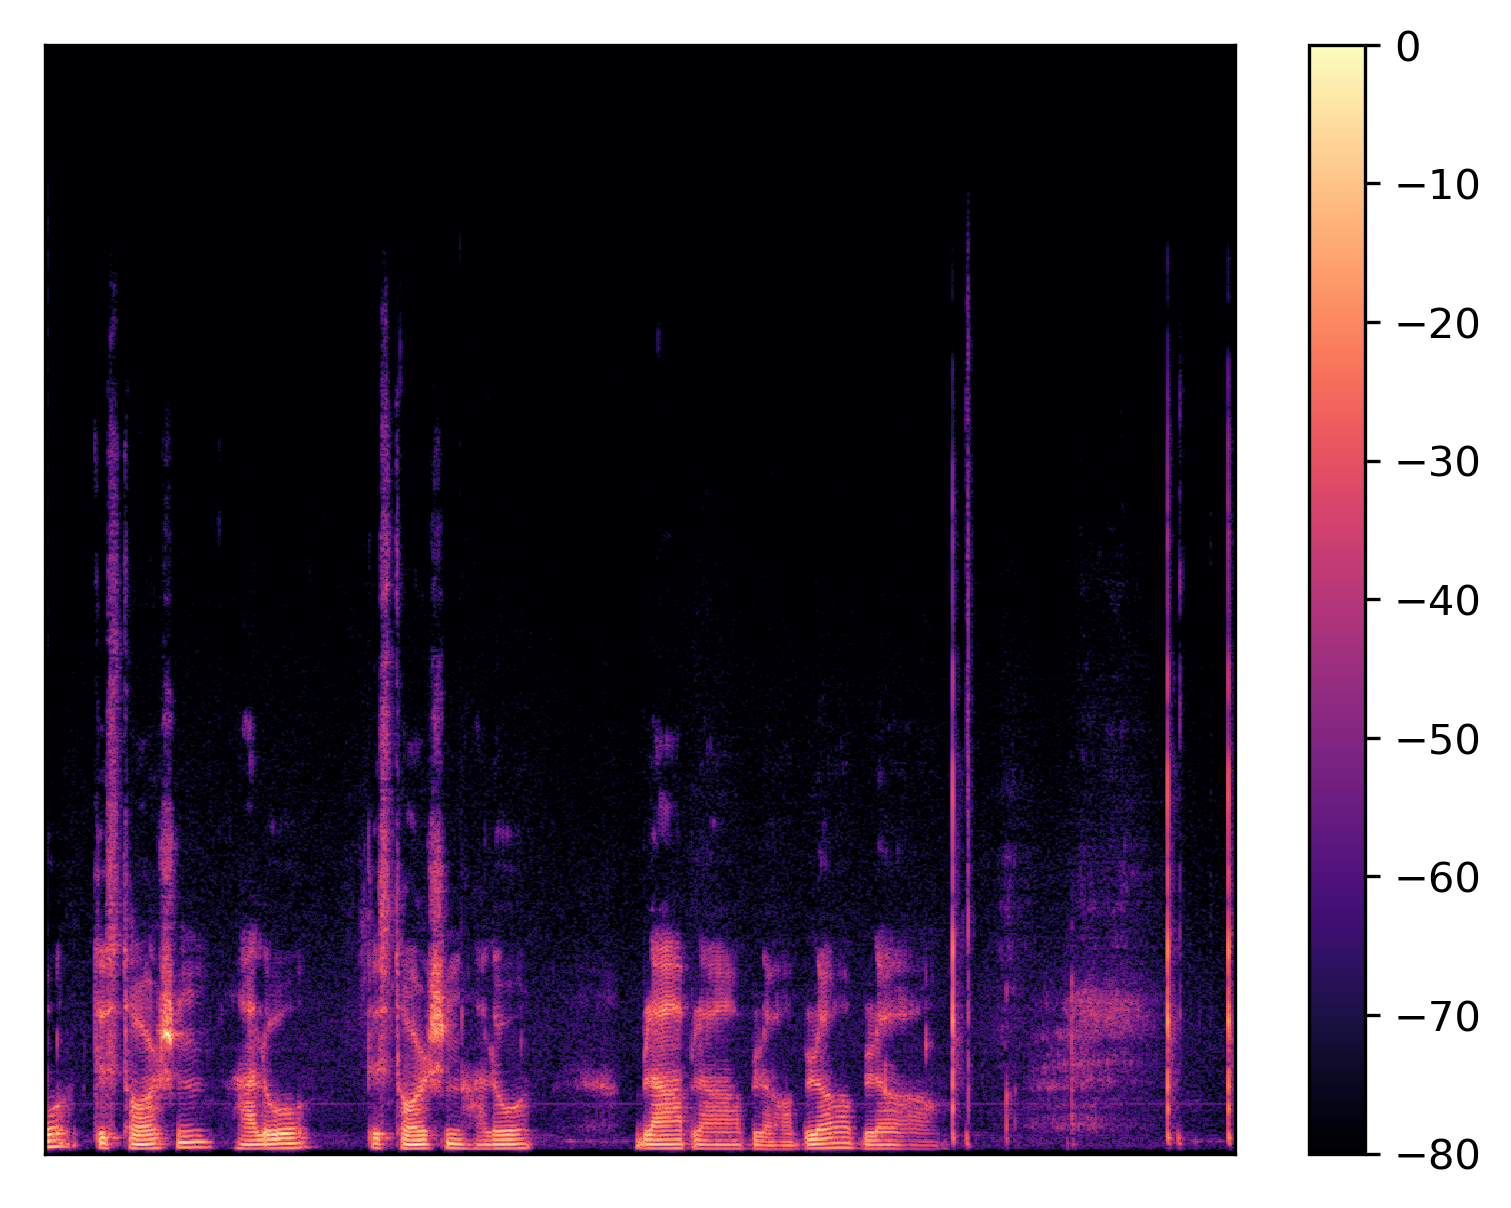

In [133]:
D = librosa.stft(y)  # STFT of y
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

fig, ax = plt.subplots(dpi=300)
img = librosa.display.specshow(S_db, ax=ax)
fig.colorbar(img, ax=ax)

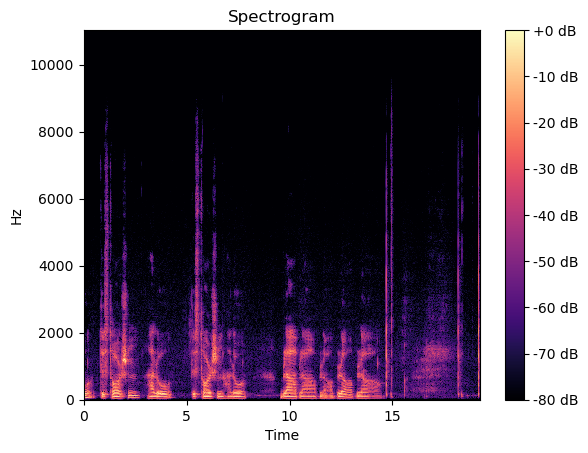

In [134]:
fig, ax = plt.subplots()
img = librosa.display.specshow(S_db, x_axis='time', y_axis='linear', ax=ax)
ax.set(title='Spectrogram')
fig.colorbar(img, ax=ax, format="%+2.f dB")

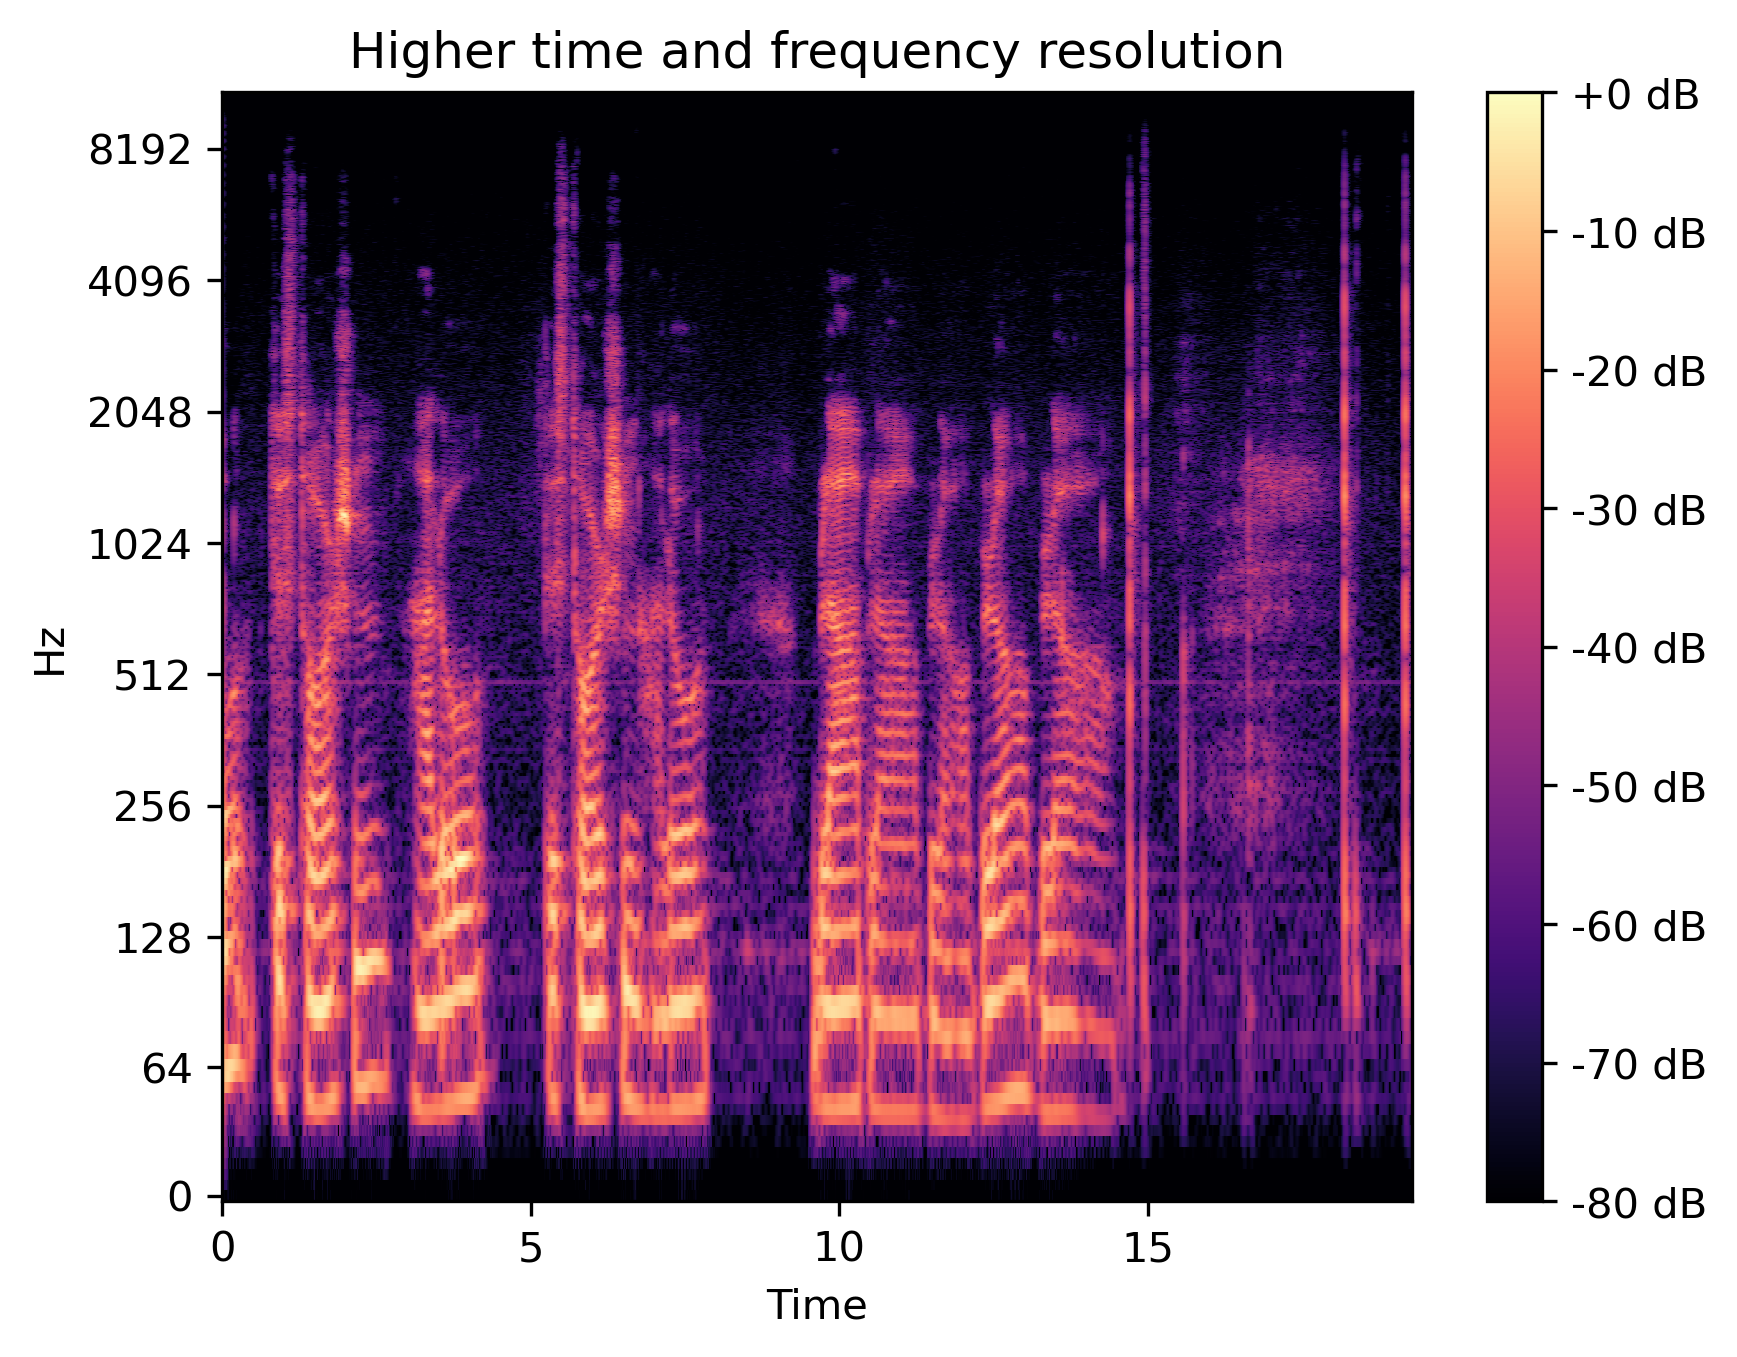

In [135]:
fig, ax = plt.subplots(dpi=300)
D_highres = librosa.stft(y, hop_length=256, n_fft=4096)
S_db_hr = librosa.amplitude_to_db(np.abs(D_highres), ref=np.max)
img = librosa.display.specshow(S_db_hr, hop_length=256,
                               x_axis='time', y_axis='log',
                               ax=ax)
ax.set(title='Higher time and frequency resolution')
fig.colorbar(img, ax=ax, format="%+2.f dB")

In [136]:
S_db_hr.shape, y.shape

((2049, 1662), (425242,))

# Mel spectrogram

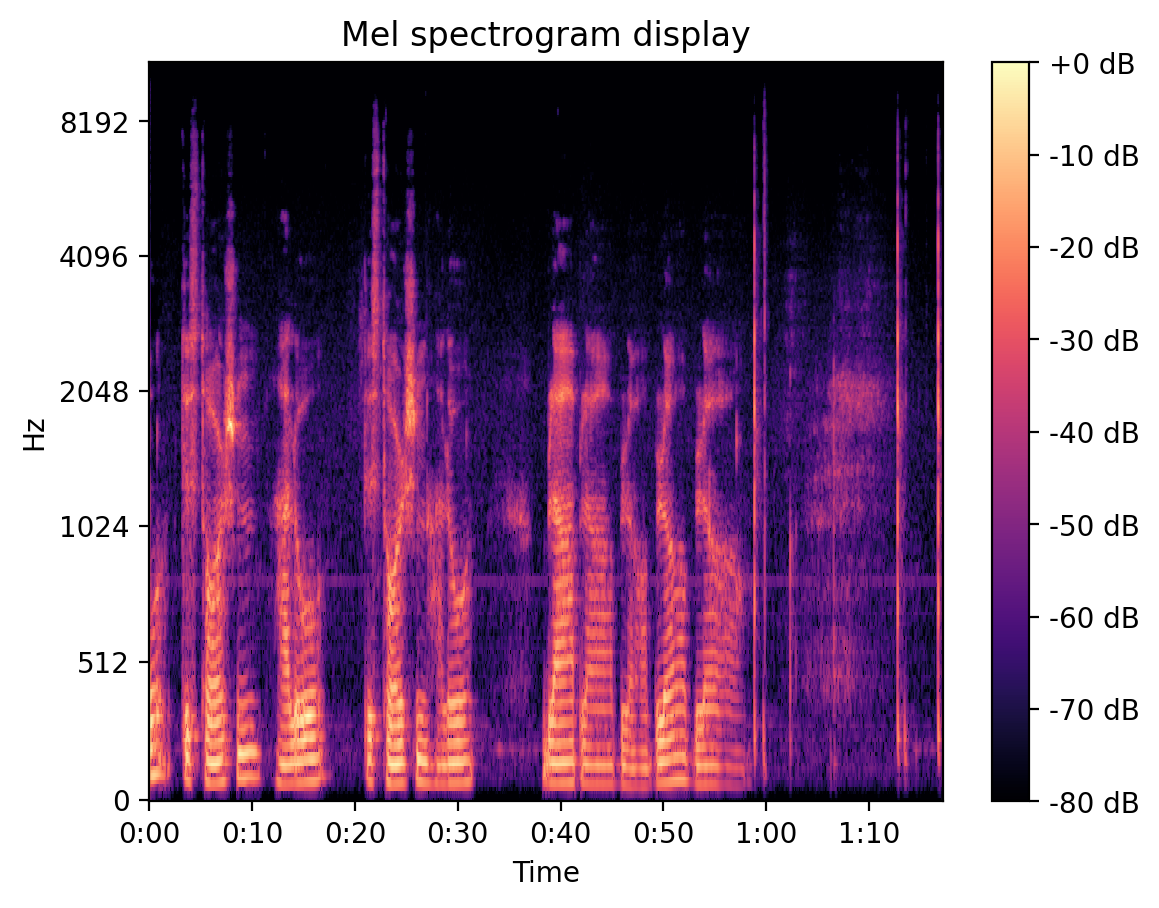

In [137]:
fig, ax = plt.subplots(dpi=200)
M = librosa.feature.melspectrogram(y=y, sr=sr,
                                   hop_length=128,
                                   n_mels=256)
M_db = librosa.power_to_db(M, ref=np.max)
img = librosa.display.specshow(M_db, y_axis='mel', x_axis='time', ax=ax)
ax.set(title='Mel spectrogram display')
fig.colorbar(img, ax=ax, format="%+2.f dB")

In [138]:
M_db.shape

(256, 3323)

In [139]:
zero_crossing_rate = librosa.feature.zero_crossing_rate(y)
zero_crossing_rate

array([[0.07421875, 0.07861328, 0.08300781, 0.015625  , 0.01367188,
        0.01171875, 0.01123047, 0.01220703, 0.015625  , 0.01904297,
        0.01953125, 0.01855469, 0.01708984, 0.01367188, 0.01171875,
        0.01220703, 0.01904297, 0.02490234, 0.02636719, 0.02392578,
        0.02148438, 0.02539062, 0.03027344, 0.04882812, 0.06738281,
        0.07470703, 0.09179688, 0.09423828, 0.08886719, 0.09423828,
        0.08789062, 0.08935547, 0.09814453, 0.09667969, 0.10888672,
        0.10791016, 0.09765625, 0.08056641, 0.05859375, 0.04785156,
        0.03466797, 0.04296875, 0.05615234, 0.08007812, 0.11083984,
        0.14697266, 0.17382812, 0.18359375, 0.19433594, 0.18066406,
        0.16455078, 0.16210938, 0.15527344, 0.15234375, 0.16259766,
        0.15136719, 0.13232422, 0.12646484, 0.09082031, 0.06591797,
        0.04931641, 0.02685547, 0.02441406, 0.02490234, 0.02148438,
        0.01953125, 0.01904297, 0.01611328, 0.01611328, 0.01611328,
        0.01611328, 0.01708984, 0.01855469, 0.02

### Spectral flatness
Spectral flatness (or tonality coefficient) is a measure to quantify how much noise-like a sound is, as opposed to being tone-like. A high spectral flatness (closer to 1.0) indicates the spectrum is similar to white noise. It is often converted to decibel.

In [140]:
flatness = librosa.feature.spectral_flatness(y=y)
flatness

array([[7.95728527e-04, 1.44195408e-04, 8.06235403e-06, 1.99941451e-06,
        2.77988329e-06, 3.04249556e-06, 3.40990732e-06, 4.82136647e-06,
        5.09700249e-06, 6.39089512e-06, 9.56348504e-06, 1.39317381e-05,
        1.99029164e-05, 4.23387319e-05, 6.70906229e-05, 8.59248903e-05,
        1.01836544e-04, 2.12210900e-04, 1.86560594e-03, 6.29124406e-04,
        2.03302392e-04, 2.52358790e-04, 1.80625380e-03, 8.20842478e-03,
        1.14964489e-02, 2.40577906e-02, 2.30295714e-02, 1.84669588e-02,
        2.07270589e-02, 2.29903553e-02, 2.53557544e-02, 2.76276972e-02,
        2.54135970e-02, 2.01801416e-02, 2.27364781e-03, 1.46248296e-03,
        8.35371786e-04, 3.52565839e-04, 3.52246134e-05, 1.12095440e-05,
        9.59611225e-06, 1.31937195e-05, 4.79117225e-05, 4.72017331e-04,
        2.05723313e-03, 4.51158918e-03, 7.99322221e-03, 1.02446312e-02,
        9.35953949e-03, 1.08302981e-02, 1.02888234e-02, 7.99882412e-03,
        8.71078297e-03, 1.11699086e-02, 1.00820819e-02, 2.945675

### Roll-off frequency
The roll-off frequency is defined for each frame as the center frequency for a spectrogram bin such that at least roll_percent (0.85 by default) of the energy of the spectrum in this frame is contained in this bin and the bins below. This can be used to, e.g., approximate the maximum (or minimum) frequency by setting roll_percent to a value close to 1 (or 0).

https://librosa.org/doc/latest/generated/librosa.feature.spectral_rolloff.html#librosa.feature.spectral_rolloff

In [141]:
rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
rolloff

array([[ 2950.04882812,  1442.72460938,   516.796875  ,   495.26367188,
          602.9296875 ,   624.46289062,   753.66210938,   904.39453125,
          925.92773438,   947.4609375 ,   925.92773438,   861.328125  ,
          818.26171875,   990.52734375,  1033.59375   ,  1033.59375   ,
         1119.7265625 ,  1335.05859375,  3832.91015625,  3208.44726562,
         2110.25390625,  2540.91796875,  5534.03320312,  7665.8203125 ,
         8010.3515625 ,  8613.28125   ,  8074.95117188,  7515.08789062,
         7967.28515625,  9130.078125  ,  9323.87695312,  9560.7421875 ,
         9323.87695312,  6481.49414062,  4112.84179688,  4069.77539062,
         4069.77539062,  4048.2421875 ,  3100.78125   ,  2842.3828125 ,
         2842.3828125 ,  2928.515625  ,  3574.51171875,  5189.50195312,
         6373.828125  ,  7601.22070312,  8333.34960938,  8850.14648438,
         9237.74414062,  9991.40625   , 10099.07226562,  9646.875     ,
         8828.61328125,  8376.41601562,  7041.35742188,  5684.76

In [142]:
rolloff_max = librosa.feature.spectral_rolloff(y=y, sr=sr, roll_percent=0.99)
rolloff_min = librosa.feature.spectral_rolloff(y=y, sr=sr, roll_percent=0.01)

rolloff_max

array([[18217.08984375, 17118.89648438,  8333.34960938,  3531.4453125 ,
         3940.57617188,  3940.57617188,  3919.04296875,  4026.70898438,
         4026.70898438,  4134.375     ,  5167.96875   ,  6524.56054688,
         8204.15039062, 11111.1328125 , 12510.79101562, 13264.453125  ,
        13888.91601562, 15396.24023438, 17937.15820312, 17614.16015625,
        16365.234375  , 16838.96484375, 18884.61914062, 19379.8828125 ,
        19401.41601562, 19487.54882812, 19336.81640625, 19121.484375  ,
        19422.94921875, 19681.34765625, 19638.28125   , 19530.61523438,
        19595.21484375, 18949.21875   , 14491.84570312, 14254.98046875,
        13608.984375  , 11283.3984375 ,  6546.09375   ,  6266.16210938,
         5620.16601562,  5641.69921875,  7816.55273438, 11993.99414062,
        13867.3828125 , 14448.77929688, 14771.77734375, 14944.04296875,
        14857.91015625, 14922.50976562, 14599.51171875, 14427.24609375,
        14642.578125  , 16128.36914062, 16020.703125  , 13996.58

In [143]:
rolloff_min

array([[ 86.1328125 ,  86.1328125 ,  86.1328125 ,  86.1328125 ,
         86.1328125 ,  86.1328125 , 107.66601562, 107.66601562,
        107.66601562, 107.66601562, 107.66601562, 107.66601562,
        107.66601562, 107.66601562, 107.66601562,  86.1328125 ,
         86.1328125 ,  64.59960938,  64.59960938,  86.1328125 ,
         86.1328125 ,  86.1328125 ,  86.1328125 ,  86.1328125 ,
         64.59960938,  64.59960938, 129.19921875, 129.19921875,
        107.66601562,  86.1328125 ,  86.1328125 , 107.66601562,
        129.19921875, 129.19921875, 236.86523438, 193.79882812,
        129.19921875,  86.1328125 ,  86.1328125 ,  86.1328125 ,
         86.1328125 ,  86.1328125 ,  86.1328125 ,  86.1328125 ,
         86.1328125 , 129.19921875, 172.265625  , 172.265625  ,
        193.79882812, 193.79882812, 172.265625  , 150.73242188,
        172.265625  , 150.73242188, 150.73242188, 215.33203125,
        215.33203125, 193.79882812,  86.1328125 ,  86.1328125 ,
         86.1328125 ,  86.1328125 ,  86.

In [144]:
tonnetz = librosa.feature.tonnetz(y=librosa.effects.harmonic(y), sr=sr)

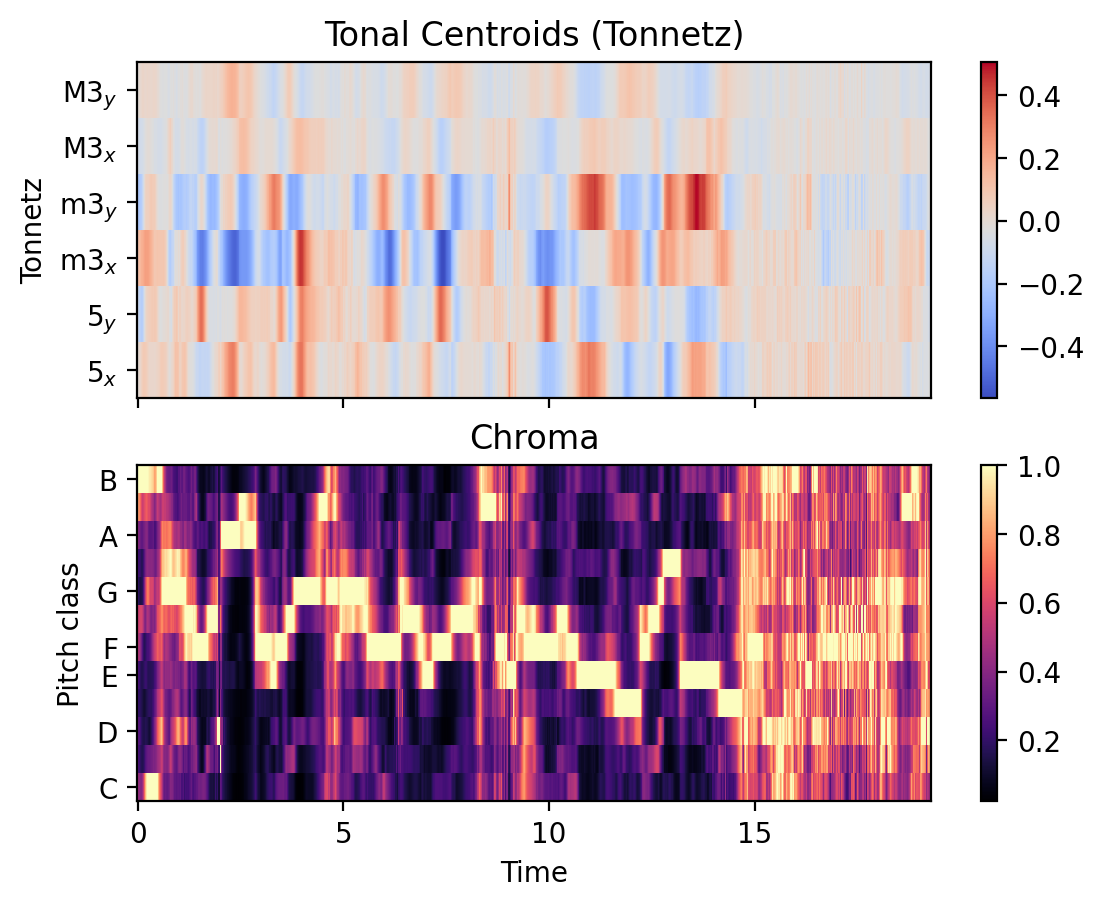

In [145]:
fig, ax = plt.subplots(nrows=2, sharex=True, dpi=200)
img1 = librosa.display.specshow(tonnetz,
                                y_axis='tonnetz', x_axis='time', ax=ax[0])

ax[0].set(title='Tonal Centroids (Tonnetz)')
ax[0].label_outer()

img2 = librosa.display.specshow(librosa.feature.chroma_cqt(y=y, sr=sr),
                                y_axis='chroma', x_axis='time', ax=ax[1])

ax[1].set(title='Chroma')
fig.colorbar(img1, ax=[ax[0]])
fig.colorbar(img2, ax=[ax[1]])

### Mel-Frequency Cepstral Coefficients (MFCC)

In [146]:
mfcc = librosa.feature.mfcc(y, sr=sr)

/var/folders/7y/sfg0yc3525z_kw02yhng5lwr0000gn/T/ipykernel_2640/1204025793.py:1: FutureWarning: Pass y=[ 1.12363841e-05 -1.31546985e-05  1.72234777e-05 ...  1.53147127e-03
  1.99118536e-03  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(y, sr=sr)


In [147]:
mfcc.shape

(20, 831)

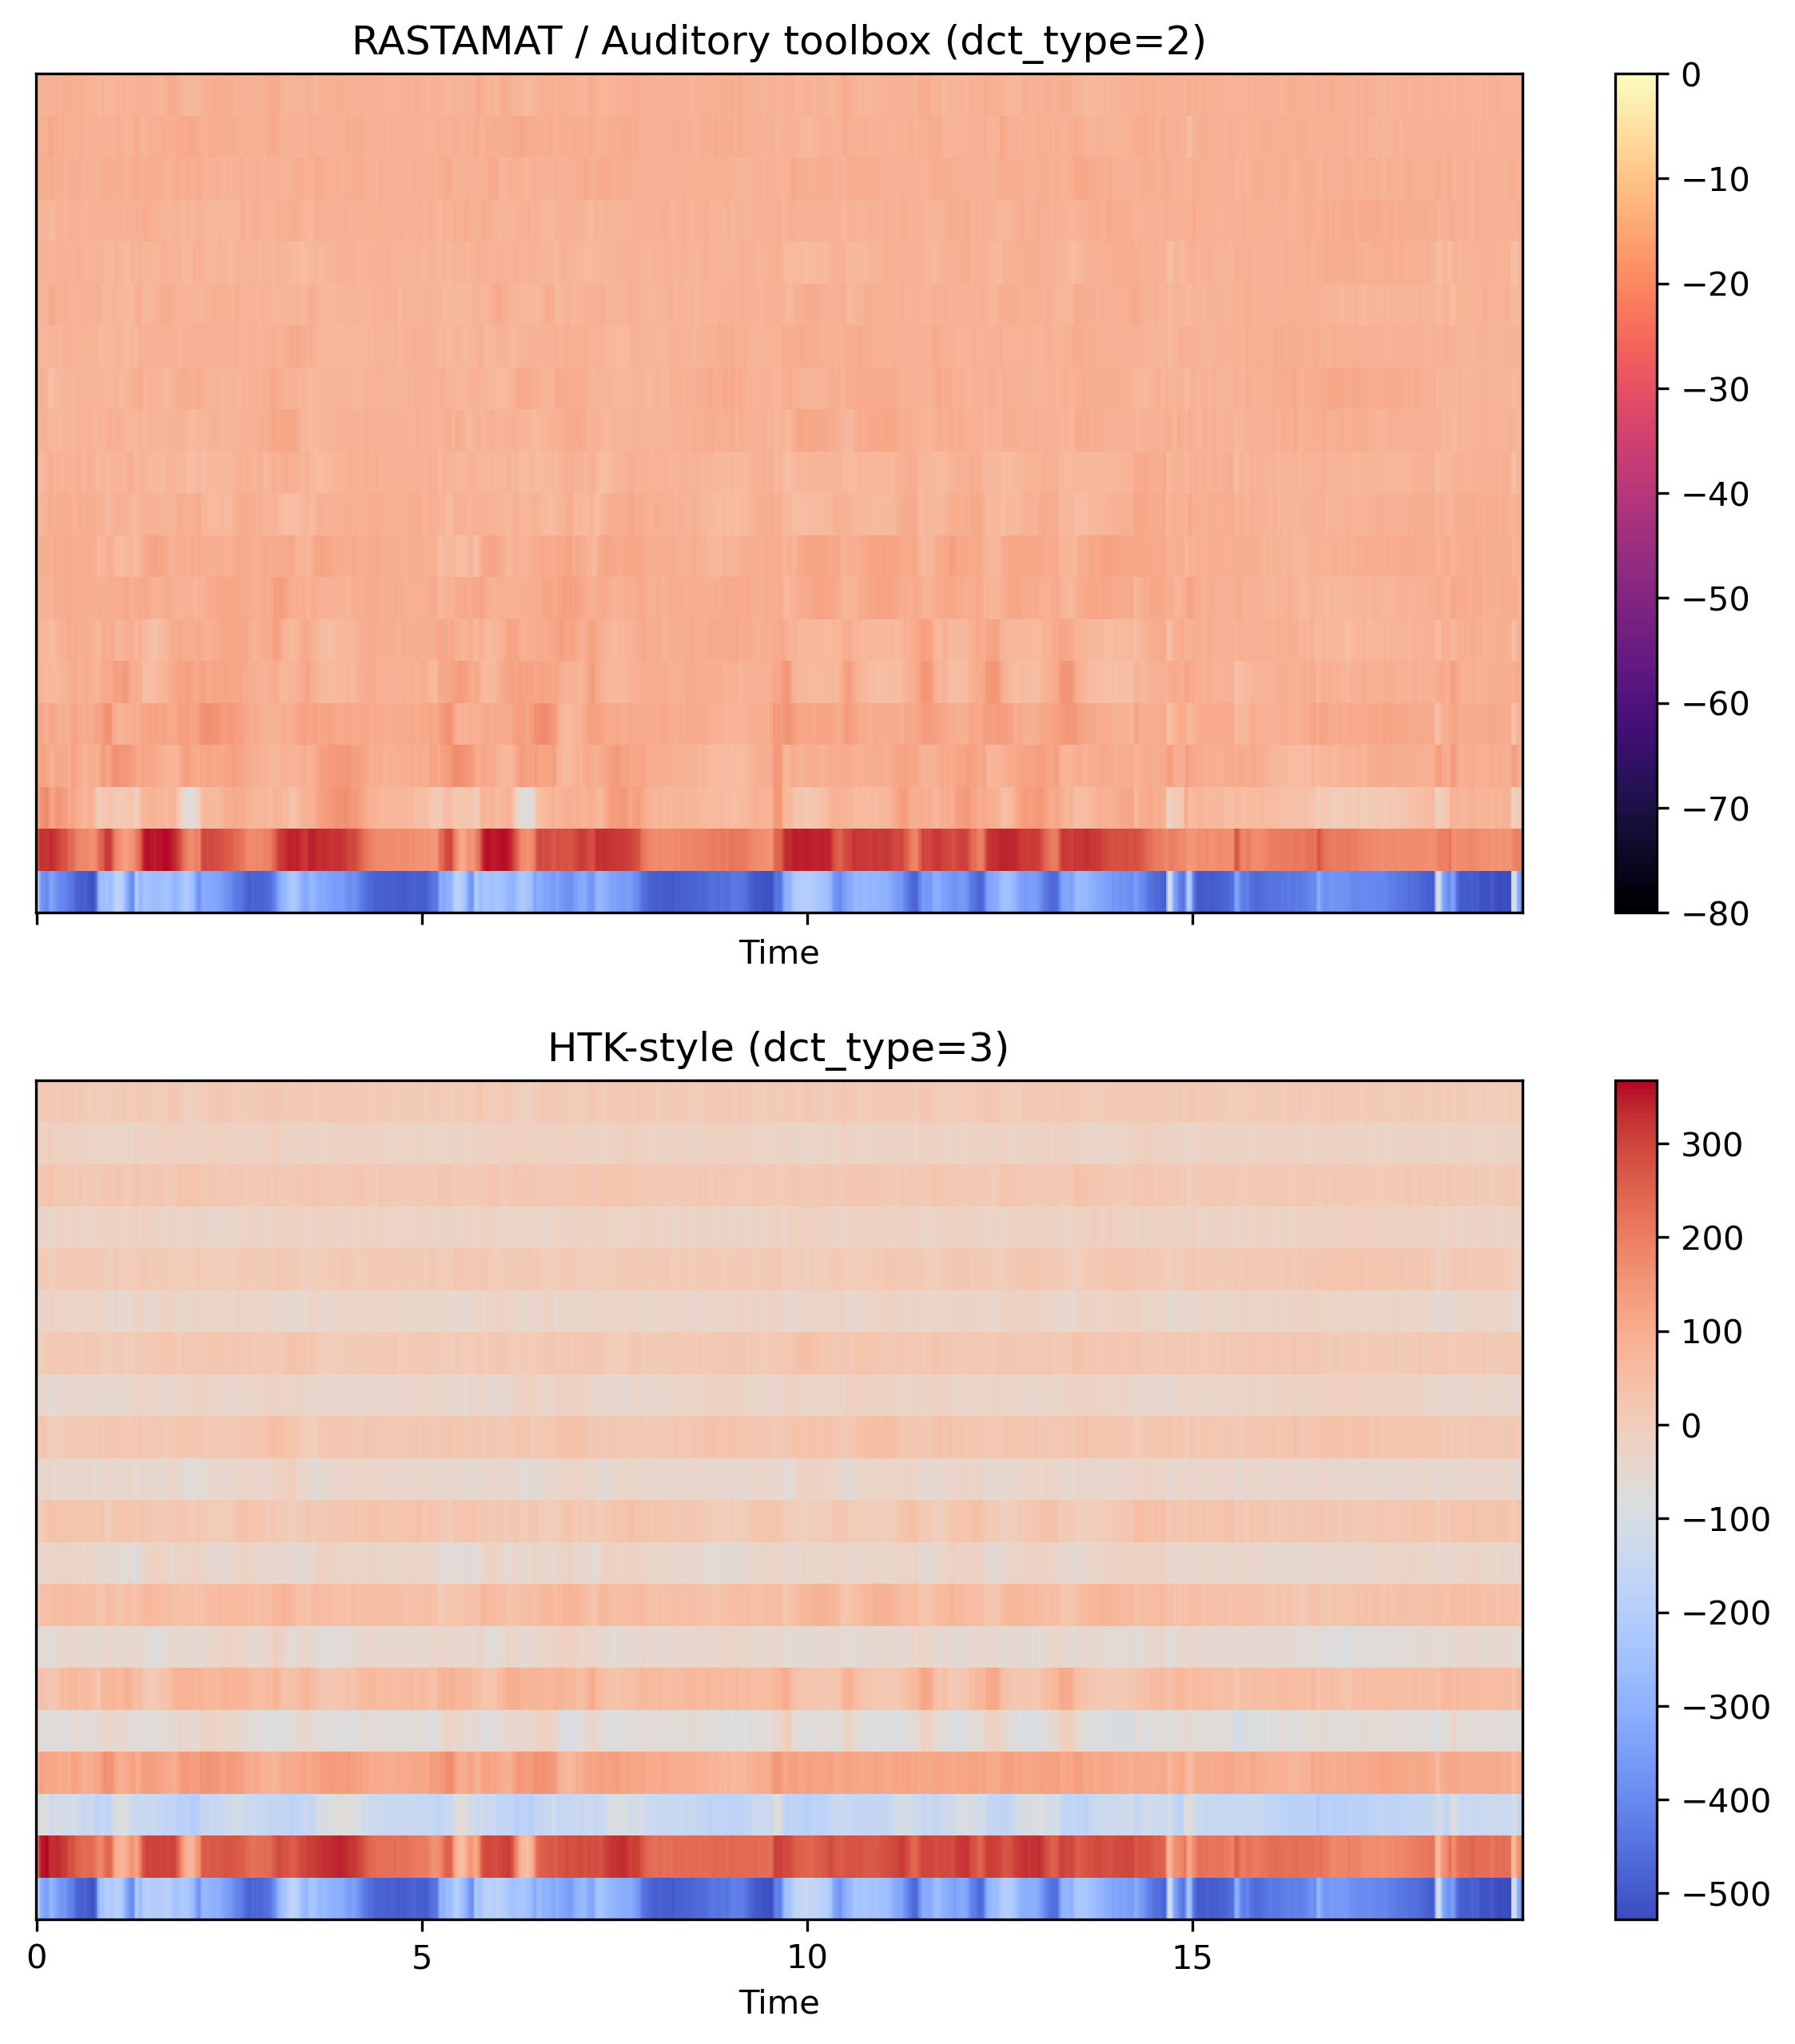

In [148]:
m_slaney = librosa.feature.mfcc(y=y, sr=sr, dct_type=2)
m_htk = librosa.feature.mfcc(y=y, sr=sr, dct_type=3)

fig, ax = plt.subplots(figsize=(10, 10), nrows=2, sharex=True, sharey=True, dpi=300)

img1 = librosa.display.specshow(m_slaney, x_axis='time', ax=ax[0])
ax[0].set(title='RASTAMAT / Auditory toolbox (dct_type=2)')
fig.colorbar(img, ax=[ax[0]])

img2 = librosa.display.specshow(m_htk, x_axis='time', ax=ax[1])
ax[1].set(title='HTK-style (dct_type=3)')
fig.colorbar(img2, ax=[ax[1]])